In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df=pd.read_csv('../input/iris/Iris.csv')

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.drop('Id',axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0.5, 1.0, 'Sepal Length VS Sepal Width')

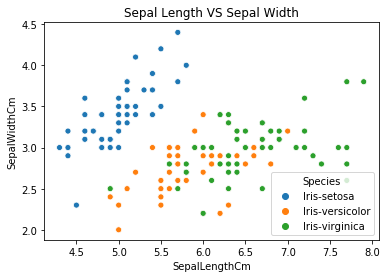

In [7]:
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
plt.title("Sepal Length VS Sepal Width")

Text(0.5, 1.0, 'Petal Length VS Petal Width')

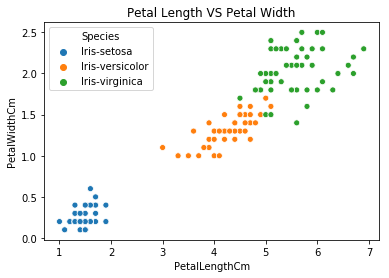

In [8]:
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue='Species')
plt.title("Petal Length VS Petal Width")

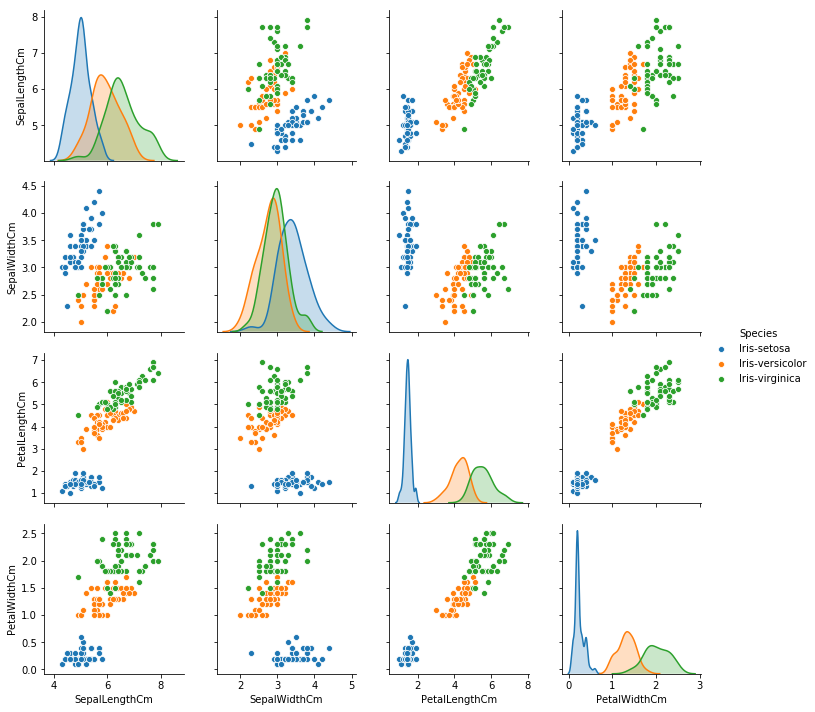

In [9]:
df1=df.drop('Id',axis=1)
sns.pairplot(df1,hue='Species')

1.After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species.
2.There is some overlap in the pairwise relationships of the other two species, iris-versicolor (yellow) and iris-virginica (green).

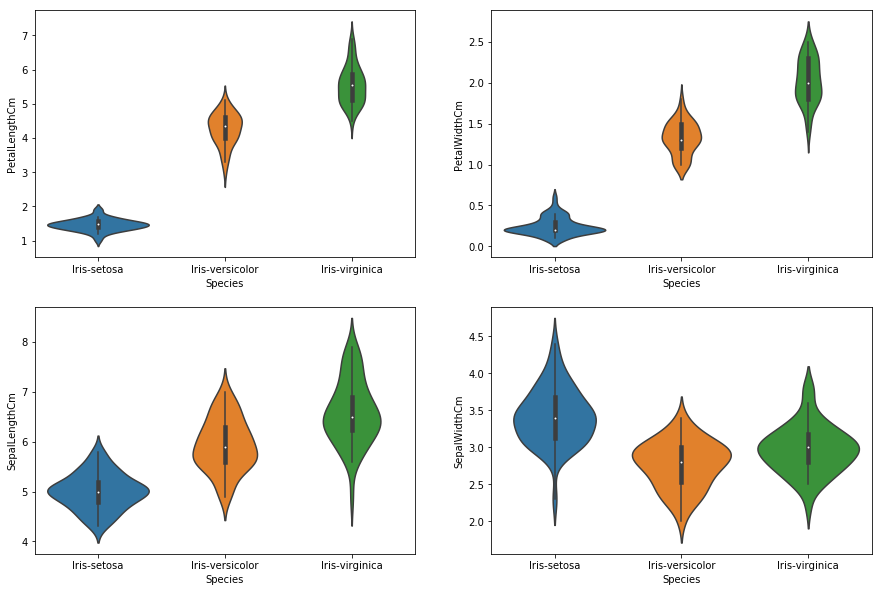

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df1)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df1)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df1)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df1)

This is how the length and width vary according to species.

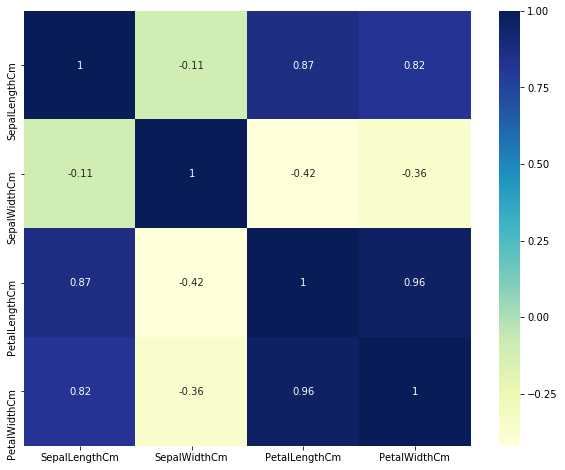

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")

we have a strong correlation between Petal Width and Petal length , and also between Petal characteristics and Sepal Length.

In [12]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [13]:
from sklearn.model_selection import train_test_split  #to split the dataset for training and testing

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


Classification Algorithms: which we used with this IRIS (structured) dataset
1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbours
4. Random forest classifier

In [15]:
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8888888888888888


In [17]:
Model = DecisionTreeClassifier()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


In [19]:
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


In [20]:
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0
